# Advanced Regressors

## Imports

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
# Load Dataset

df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/rock_density_xray.csv') # rock_density
df.head(5)

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [129]:
# Rename Columns

df.columns = ['Signal', 'Density']
df.head(5)

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Signal', ylabel='Density'>

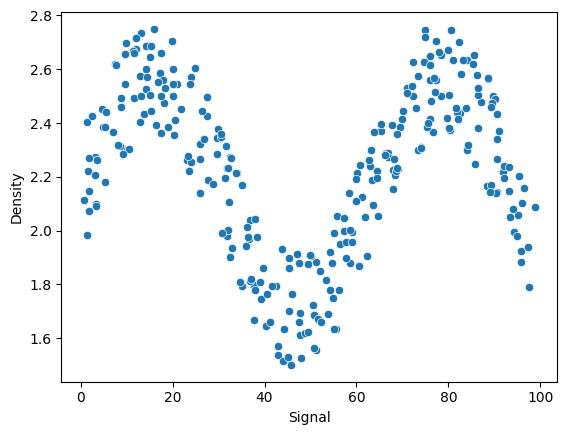

In [130]:
# Visualize the Data

sns.scatterplot(x = 'Signal', y = 'Density', data = df)

In [131]:
# Assign features and target values

X = df['Signal'].values.reshape(-1,1)
y = df['Density']

## Train-Test Split

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

## Model Comparisons

In [133]:
# Import Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

### Linear Regression Model

In [134]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_predictions

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [135]:
# Performance Metrics

print(mean_absolute_error(y_test, lr_predictions))
print(mean_squared_error(y_test, lr_predictions))
print(np.sqrt(mean_squared_error(y_test, lr_predictions)))

0.211198973318633
0.06605167265148638
0.2570051996584629


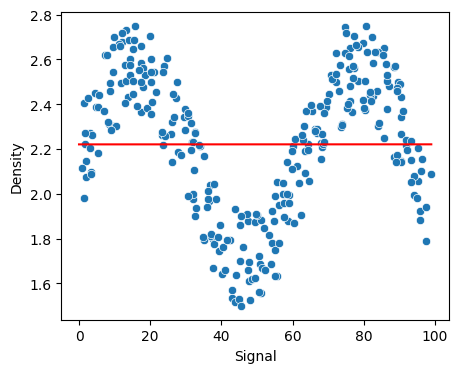

In [136]:
# Plot Prediction

plt.figure(figsize = (5,4))
sns.scatterplot(x = 'Signal', y = 'Density', data = df)

signal_range = np.arange(0,100)
signal_predictions = lr_model.predict(signal_range.reshape(-1,1))
plt.plot(signal_range, signal_predictions, color = 'r')

In [137]:
# Helper Functions to Test Each Models onwards

def run_model(model, X_train, y_train, X_test, y_test):

  # FIT MODEL TRAINING
  model.fit(X_train, y_train)

  # GET METRICS
  predictions = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, predictions))
  mae = mean_absolute_error(y_test, predictions)
  print(f'RMSE: {rmse}')
  print(f'MAE: {mae}')

  # PLOT RESULTS OF THE MODEL PREDICTION
  signal_range = np.arange(0,100)
  predictions = model.predict(signal_range.reshape(-1,1))

  plt.figure(figsize = (5,4))
  sns.scatterplot(x = 'Signal', y = 'Density', data = df)
  plt.plot(signal_range, predictions, color = 'r')

RMSE: 0.2570051996584629
MAE: 0.211198973318633


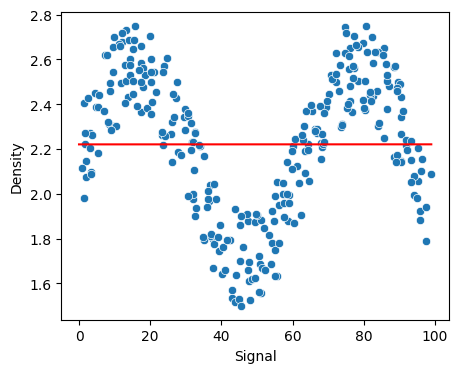

In [138]:
# Same with above but with the use of a Helper Function

model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

## Polynomial Regression Model

In [139]:
from sklearn.pipeline import make_pipeline # task pipeline
from sklearn.preprocessing import PolynomialFeatures  # define degree of Polynomial

RMSE: 0.13807449061369673
MAE: 0.11969122389483997


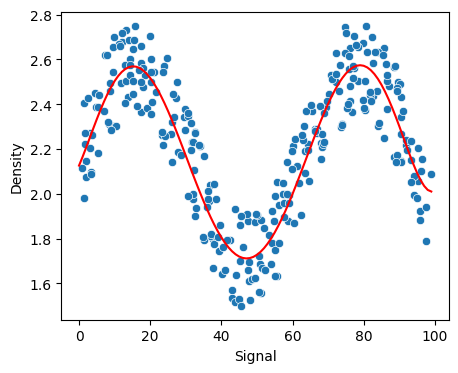

In [140]:
pipe = make_pipeline(PolynomialFeatures(degree = 6), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

## KNN Regression Model

RMSE: 0.1523487028635337
MAE: 0.11877297474442378
RMSE: 0.13730685016923647
MAE: 0.12198383614100558
RMSE: 0.13277855732740926
MAE: 0.11635971693292672
RMSE: 0.15954234753677107
MAE: 0.13363165935705318


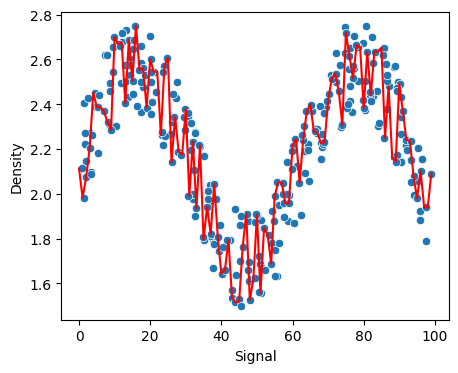

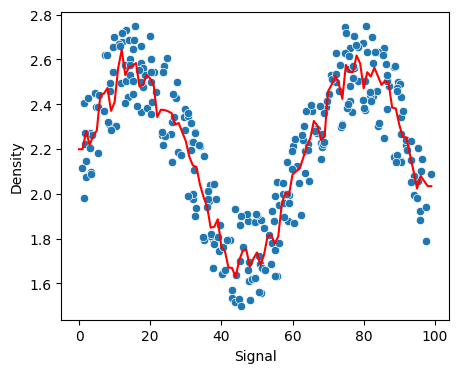

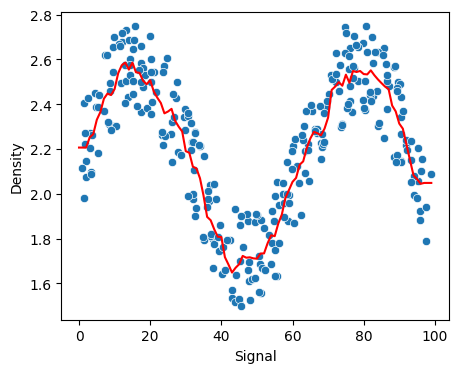

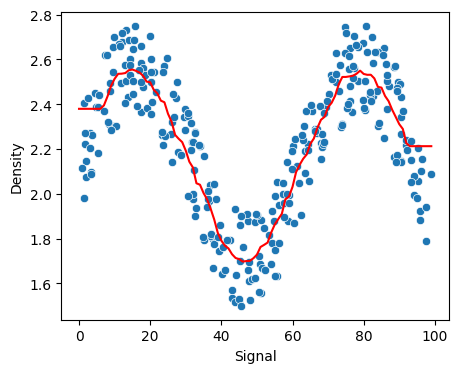

In [141]:
from sklearn.neighbors import KNeighborsRegressor

k_values = [1, 5, 10, 30]

for n in k_values:

  model = KNeighborsRegressor(n_neighbors = n)
  run_model(model, X_train, y_train, X_test, y_test)

## Decision Tree Regressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


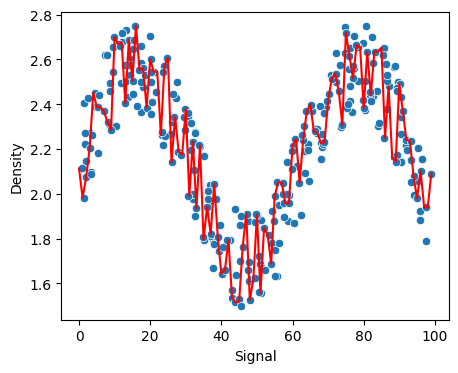

In [142]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

## Support Vector Regression

RMSE: 0.12646999302047557
MAE: 0.10854210121349125


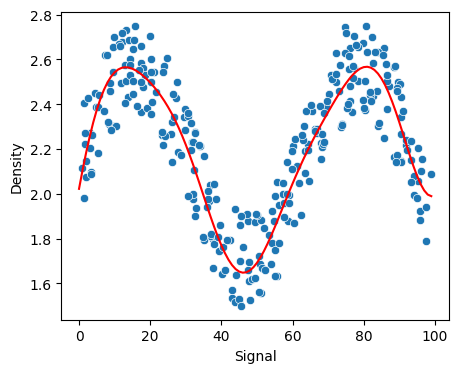

In [143]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000], 'gamma': ['auto', 'scale']}

grid = GridSearchCV(svr, param_grid)
run_model(grid, X_train, y_train, X_test, y_test)

## Random Forest Regression Model

RMSE: 0.13096259461028004
MAE: 0.10946812298944547


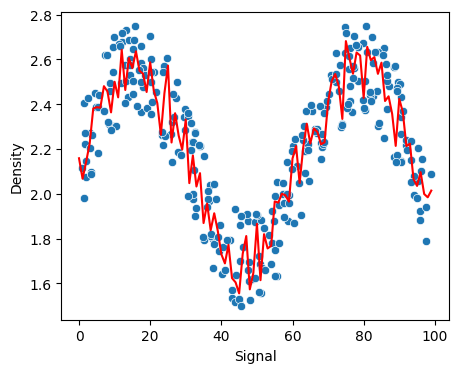

In [144]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 10)
run_model(model, X_train, y_train, X_test, y_test)

## Gradient Boosting Regression

RMSE: 0.13294148649584667
MAE: 0.11318284854800689


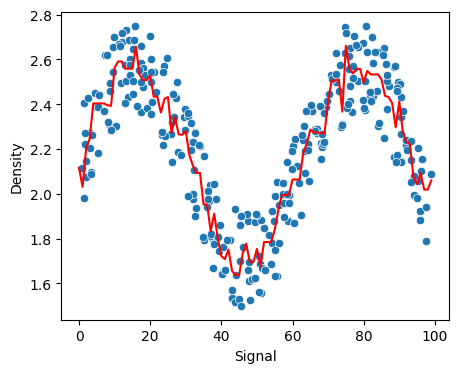

In [145]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

## AdaBoost Regression

RMSE: 0.14061252254740614
MAE: 0.12368062843137763


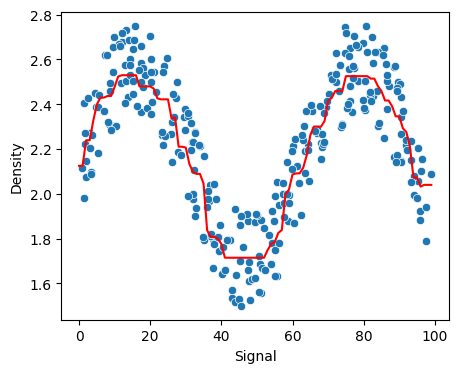

In [146]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)